In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [15]:
# Files to Load 

Rankings_data = "Data/Spotify_Worldwide_Daily_Song_Ranking.csv"
Features_data = "Data/SpotifyFeatures.csv"


In [14]:
# Read Rankings and Features Data File and store into Pandas DataFrames
RankingsData = pd.read_csv(Rankings_data)
FeaturesData = pd.read_csv(Features_data)

In [5]:
# Features Data
FeaturesData = pd.read_csv(Features_data, low_memory=False)
FeaturesData.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [6]:
genrecount = FeaturesData.groupby(["genre"]).count()
genrecount = genrecount.sort_values("popularity", ascending=False)
genrecount = genrecount.head(10)
genrecount

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
Comedy,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681
Soundtrack,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646
Indie,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543
Jazz,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441
Pop,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386
Electronic,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377
Children’s Music,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353
Folk,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299
Hip-Hop,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295


In [7]:
genrecount =  FeaturesData.groupby(["genre"]).count()["artist_name"].rename("Counts of Genre")
genrecountDF = pd.DataFrame({"Counts of Genre":genrecount})
genrecountDF = genrecountDF.sort_values("Counts of Genre", ascending=False)
genrecountDF = genrecountDF.head(10)
genrecountDF

,Counts of Genre
genre,
Comedy,9681
Soundtrack,9646
Indie,9543
Jazz,9441
Pop,9386
Electronic,9377
Children’s Music,9353
Folk,9299
Hip-Hop,9295


In [8]:
# Labels for the sections of our pie chart
labels = ["Comedy", "Soundtrack", "Indie", "Jazz", "Pop", "Electronic", "Children's Music", "Folk", "Hip-Hop", "Rock"]

# The values of each section of the pie chart
sizes = [9681, 9646, 9543, 9441, 9386, 9377, 9353, 9299, 9295, 9272]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

<IPython.core.display.Javascript object>


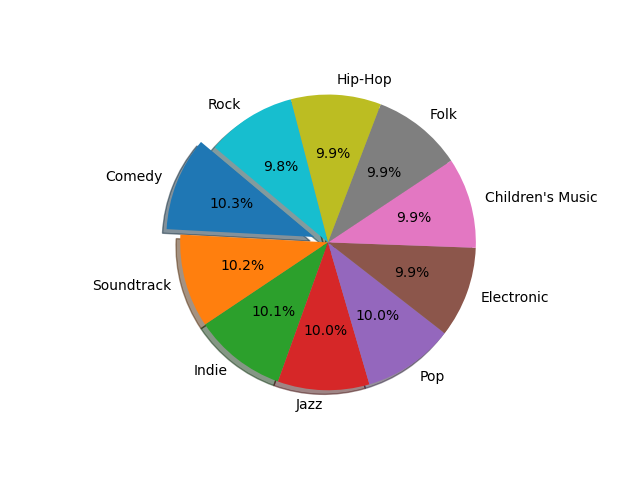

Text(0.5, 1.0, 'Top 10 Genres')

In [10]:
# Display Pie Chart
plt.pie(sizes, explode=explode, labels=labels, radius=1, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Top 10 Genres", pad=100, fontsize=15)



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import param
import panel as pn
%matplotlib inline

In [ ]:
# import Spotify Features CSV
Features_data = "Data\SpotifyFeatures.csv"

# Create dataframe 1 and read csv
df1 = pd.read_csv(Features_data)
df1.style.hide_index()

In [ ]:
# import Daily Song Ranking CSV
Streams_data = "Data\Spotify_Worldwide_Daily_Song_Ranking.csv"

# Create dataframe 2 and read csv
df2 = pd.read_csv(Streams_data)
df2.style.hide_index()

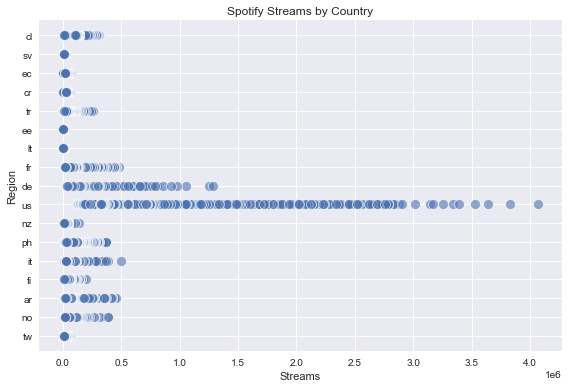

In [20]:
#scatter_plotting.py

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')  # to get seaborn scatter plot

# read the csv file to extract data

data = pd.read_csv('Data\Spotify_Worldwide_Daily_Song_Ranking.csv')
streams = data['Streams']
region = data['Region']

plt.scatter(streams, region, s=100, alpha=0.6, edgecolor='white', linewidth=1)


plt.title('Spotify Streams by Country')
plt.xlabel('Streams')
plt.ylabel('Region')

plt.tight_layout()


In [35]:
# Files to Load 

Rankings_data = "Data/Spotify_Worldwide_Daily_Song_Ranking.csv"
Features_data = "Data/SpotifyFeatures.csv"


In [36]:
# Read Rankings and Features Data File and store into Pandas DataFrames
RankingsData = pd.read_csv(Rankings_data)
FeaturesData = pd.read_csv(Features_data)

In [ ]:
# Rankings Data
RankingsData = pd.read_csv(Rankings_data)
RankingsData.head()

In [38]:
# Display Top 20 Artists

top20 = RankingsData.groupby("Artist")["Streams"].sum().sort_values(ascending=False).head(20)


In [39]:
# display(top20)

top20.head()

Artist
Ed Sheeran          1732874501
Drake               1436978090
Kendrick Lamar      1311413454
Post Malone         1220170836
The Chainsmokers    1061168078
Name: Streams, dtype: int64

Text(0, 0.5, 'Number of Streams')

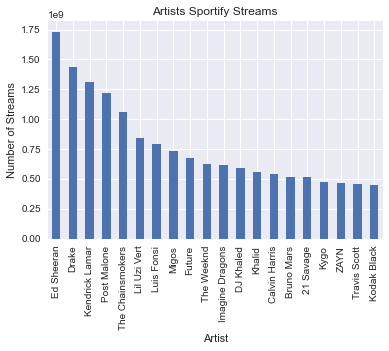

In [40]:
# Display Barchart
top20.plot(kind='bar')
plt.title("Artists Sportify Streams")
plt.xlabel("Artist")
plt.ylabel("Number of Streams")

In [41]:
print(np.round(top20.values/1000000),0)

[1733. 1437. 1311. 1220. 1061.  845.  791.  732.  673.  622.  618.  589.
  555.  543.  515.  512.  472.  465.  461.  452.] 0


In [42]:
print(top20.index)

Index(['Ed Sheeran', 'Drake', 'Kendrick Lamar', 'Post Malone',
       'The Chainsmokers', 'Lil Uzi Vert', 'Luis Fonsi', 'Migos', 'Future',
       'The Weeknd', 'Imagine Dragons', 'DJ Khaled', 'Khalid', 'Calvin Harris',
       'Bruno Mars', '21 Savage', 'Kygo', 'ZAYN', 'Travis Scott',
       'Kodak Black'],
      dtype='object', name='Artist')


# Spotify Wrapped: A Global Trend Analysis 

In [2]:
from ipywidgets import IntSlider

IntSlider(description='The US has the highest number of Spotify streams')

IntSlider(value=0, description='A too long description')

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




In [3]:
# Files to Load 

Rankings_data = "Data/Spotify_Worldwide_Daily_Song_Ranking.csv"
Features_data = "Data/SpotifyFeatures.csv"


In [4]:
# Read Rankings and Features Data File and store into Pandas DataFrames
RankingsData = pd.read_csv(Rankings_data)
FeaturesData = pd.read_csv(Features_data)

In [5]:
# Rankings Data
RankingsData = pd.read_csv(Rankings_data)
RankingsData.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [6]:
# Display Top 20 Artists

top20 = RankingsData.groupby("Artist")["Streams"].sum().sort_values(ascending=False).head(20)



In [7]:
# display(top20)

top20.head()

Artist
Ed Sheeran          8913973976
Drake               4523630992
The Chainsmokers    4292590087
Post Malone         3700404149
Kendrick Lamar      3570665303
Name: Streams, dtype: int64

<IPython.core.display.Javascript object>


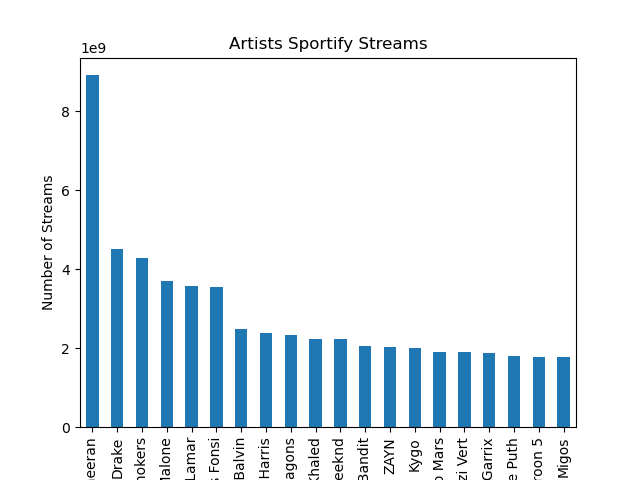

Text(0, 0.5, 'Number of Streams')

In [14]:
# Display Barchart
top20.plot(kind='bar')
plt.title("Artists Sportify Streams")
plt.xlabel("Artist")
plt.ylabel("Number of Streams")

In [13]:

print(np.round(top20.values/1000000),0)



[8914. 4524. 4293. 3700. 3571. 3556. 2495. 2398. 2323. 2236. 2225. 2059.
 2019. 2017. 1916. 1904. 1867. 1815. 1771. 1769.] 0


In [11]:
print(top20.index)

Index(['Ed Sheeran', 'Drake', 'The Chainsmokers', 'Post Malone',
       'Kendrick Lamar', 'Luis Fonsi', 'J Balvin', 'Calvin Harris',
       'Imagine Dragons', 'DJ Khaled', 'The Weeknd', 'Clean Bandit', 'ZAYN',
       'Kygo', 'Bruno Mars', 'Lil Uzi Vert', 'Martin Garrix', 'Charlie Puth',
       'Maroon 5', 'Migos'],
      dtype='object', name='Artist')


In [ ]:
# Rename Rankings Data
# renamed_data = RankingsData.rename(columns={"Artist":"artist_name"})

# renamed_data.head()

In [ ]:
# Features Data
# FeaturesData = pd.read_csv(Features_data, low_memory=False)
# FeaturesData.head()

In [ ]:
# Combine the data into a single dataset
# music_complete = pd.merge(renamed_data, FeaturesData,on=["artist_name"])


In [ ]:
# Display the data table for preview
# music_complete.head()

In [11]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("Data/Spotify_Worldwide_Daily_Song_Ranking.csv")
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,188,Sketch U,100%,2465,https://open.spotify.com/track/4QU5K3jyisGoI1p...,2/24/2017,tw
1,147,Cut4marco,6150,10597,https://open.spotify.com/track/5814tCV3ZWhRCNh...,8/23/2017,no
2,127,Cut4marco,6150,12208,https://open.spotify.com/track/5814tCV3ZWhRCNh...,8/24/2017,no
3,67,Hasta la luna,#TocoParaVos,35806,https://open.spotify.com/track/1A3yLIqelu1D7MC...,1/1/2017,ar
4,117,Una historia,#TocoParaVos,21108,https://open.spotify.com/track/6Ol4gn2vFyn4dck...,1/1/2017,ar


In [6]:
df[["Region", "Artist","Streams"]].head()

,Region,Artist,Streams
0,tw,100%,2465
1,no,6150,10597
2,no,6150,12208
3,ar,#TocoParaVos,35806
4,ar,#TocoParaVos,21108


In [7]:
df["Region"].value_counts()

ar    74200
tw    74200
ph    74200
nz    74200
ec    74200
no    74200
tr    74200
fr    74200
de    74200
cr    74200
it    74200
fi    74200
us    74200
sv    38893
lt    16799
cl    15460
ee    12823
Name: Region, dtype: int64

In [8]:
df.loc[(df["Region"]=='it'), "Region"]="Italy"
df.loc[(df["Region"]=='de'), "Region"]="Denmark"
df.loc[(df["Region"]=='no'), "Region"]="Norway"
df.loc[(df["Region"]=='ar'), "Region"]="Argentina"
df.loc[(df["Region"]=='tw'), "Region"]="Taiwan"
df.loc[(df["Region"]=='nz'), "Region"]="New Zealand"
df.loc[(df["Region"]=='fi'), "Region"]="Finland"
df.loc[(df["Region"]=='us'), "Region"]="US"
df.loc[(df["Region"]=='tr'), "Region"]="Turkey"
df.loc[(df["Region"]=='ec'), "Region"]="Ecuador"
df.loc[(df["Region"]=='ph'), "Region"]="Phillippines"
df.loc[(df["Region"]=='fr'), "Region"]="France"
df.loc[(df["Region"]=='cr'), "Region"]="Costa Rica"
df.loc[(df["Region"]=='sv'), "Region"]="El Salvador"
df.loc[(df["Region"]=='lt'), "Region"]="Lithuania"
df.loc[(df["Region"]=='cl'), "Region"]="Chile"
df.loc[(df["Region"]=='ee'), "Region"]="Estonia"

In [12]:
df.drop('Index', axis=1, inplace=True)

KeyError: "['Index'] not found in axis"